In [14]:
from ANNarchy import *
clear()

In [15]:
LIF = Neuron(
    parameters="""
        tau = 20.
        E_L = -70.
        v_T = 0.
        v_r = -58.
        tau_b = 10.0
        tau_c = 10.0
    """,
    equations="""
        tau * dv/dt = (E_L - v) + g_a + g_b + alpha_c : init=-70.
        
        tau_b * dg_b/dt = -g_b : exponential
        
        tau_c * dg_c/dt = -g_c : exponential
        tau_c * dalpha_c/dt = exp((tau_c - dt/2.0)/tau_c) * g_c - alpha_c  : exponential
    """,
    spike=" v >= v_T ",
    reset=" v = v_r ",
    refractory = 2.0
)

In [16]:
inp = SpikeSourceArray([10.])
pop = Population(1, LIF)

In [17]:
proj = Projection(inp, pop, 'a').connect_all_to_all(weights=1.0)
proj = Projection(inp, pop, 'b').connect_all_to_all(weights=1.0)
proj = Projection(inp, pop, 'c').connect_all_to_all(weights=1.0)

In [18]:
compile()

In [19]:
m = Monitor(pop, ['g_a', 'g_b', 'alpha_c'])

In [20]:
inp.clear()
simulate(100.)

In [21]:
data = m.get()

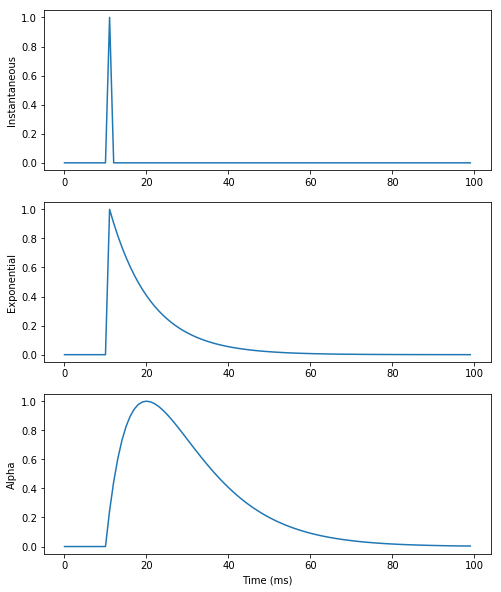

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 10))
plt.subplot(311)
plt.plot(data['g_a'][:, 0])
plt.ylabel("Instantaneous")
plt.subplot(312)
plt.plot(data['g_b'][:, 0])
plt.ylabel("Exponential")
plt.subplot(313)
plt.plot(data['alpha_c'][:, 0])
plt.xlabel("Time (ms)")
plt.ylabel("Alpha")
plt.show()